In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

# Step 1: Load the processed Spark output
files = glob.glob("output/processed_bus_data/*.json")
df = pd.concat([pd.read_json(f, lines=True) for f in files], ignore_index=True)

# Step 2: Convert timestamps
if 'fetched_at' in df.columns:
    df['fetched_at'] = pd.to_datetime(df['fetched_at'])

# Step 3: Check routes captured
print("Routes in data:", df['rt'].unique())
print("Size of the data:", df.shape)

df.head()

Routes in data: [ 8 22 49 66 79]
Size of the data: (5297, 15)


,vid,tmstmp,lat,lon,hdg,pid,rt,des,pdist,dly,tatripid,origtatripno,tablockid,zone,fetched_at
0,1328,20251016 17:57,41.857101,-87.646614,177,8959,8,79th,9763,False,88356351,267681397,8 -761,,2025-10-16 22:58:01.719429+00:00
1,8559,20251016 17:57,41.910992,-87.648279,181,9368,8,79th,14615,False,88356294,267681498,SH -754,,2025-10-16 22:58:01.719429+00:00
2,8470,20251016 17:57,41.897061,-87.634232,178,9368,8,79th,23448,False,88356292,267681496,8 -756,,2025-10-16 22:58:01.719429+00:00
3,1286,20251016 17:57,41.895296,-87.634170,178,9368,8,79th,24096,False,88356286,267681493,8 -723,,2025-10-16 22:58:01.719429+00:00
4,7923,20251016 17:57,41.893901,-87.634129,176,9368,8,79th,24608,False,88356288,267681494,SH -751,,2025-10-16 22:58:01.719429+00:00


In [2]:
df.isnull().sum()

vid             0
tmstmp          0
lat             0
lon             0
hdg             0
pid             0
rt              0
des             0
pdist           0
dly             0
tatripid        0
origtatripno    0
tablockid       0
zone            0
fetched_at      0
dtype: int64

In [3]:
df.describe(include='all')

,vid,tmstmp,lat,lon,hdg,pid,rt,des,pdist,dly,tatripid,origtatripno,tablockid,zone,fetched_at
count,2903.000000,2903,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903,2903.000000,2903,2903.0,2.903000e+03,2903,2903,2903
unique,NaN,65,NaN,NaN,NaN,NaN,NaN,15,NaN,2,243.0,NaN,154,1,NaN
top,NaN,20251016 17:06,NaN,NaN,NaN,NaN,NaN,Howard,NaN,False,1040929.0,NaN,22 -519,,NaN
freq,NaN,141,NaN,NaN,NaN,NaN,NaN,457,NaN,2891,40.0,NaN,53,2903,NaN
mean,4833.996555,NaN,41.874367,-87.652371,213.860145,4745.593524,42.183948,NaN,29547.153634,NaN,NaN,2.678569e+08,NaN,NaN,2025-10-16 22:11:53.703195392+00:00
min,606.000000,NaN,41.749101,-87.775017,0.000000,1178.000000,8.000000,NaN,0.000000,NaN,NaN,2.676695e+08,NaN,NaN,2025-10-16 21:19:43.474242+00:00
25%,1432.000000,NaN,41.812387,-87.675786,156.000000,1628.000000,22.000000,NaN,10393.500000,NaN,NaN,2.676814e+08,NaN,NaN,2025-10-16 22:04:30.227249920+00:00
50%,4165.000000,NaN,41.894749,-87.646553,181.000000,3936.000000,49.000000,NaN,26285.000000,NaN,NaN,2.676867e+08,NaN,NaN,2025-10-16 22:16:33.532307968+00:00
75%,8177.000000,NaN,41.920136,-87.631142,312.000000,6665.000000,66.000000,NaN,45267.000000,NaN,NaN,2.678901e+08,NaN,NaN,2025-10-16 22:26:37.525175040+00:00
max,8937.000000,NaN,42.019409,-87.544516,359.000000,10951.000000,79.000000,NaN,83819.000000,NaN,NaN,2.692256e+08,NaN,NaN,2025-10-16 22:36:45.318572+00:00


In [4]:
print(df.columns)

Index(['vid', 'tmstmp', 'lat', 'lon', 'hdg', 'pid', 'rt', 'des', 'pdist',
       'dly', 'tatripid', 'origtatripno', 'tablockid', 'zone', 'fetched_at'],
      dtype='object')


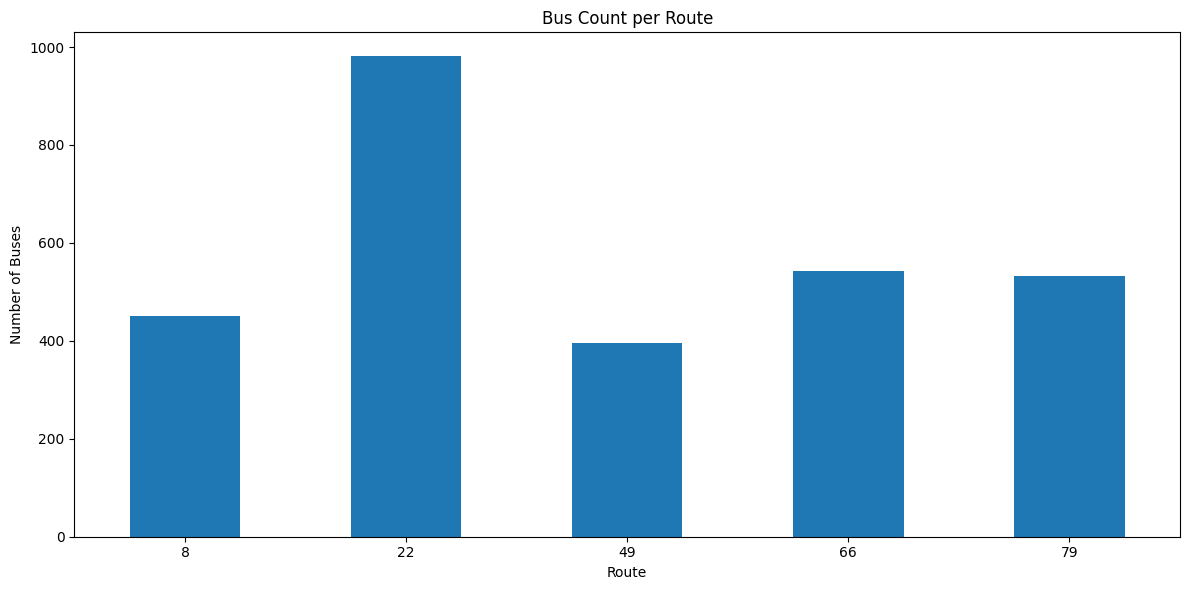

In [5]:
df['rt'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title("Bus Count per Route")
plt.xlabel("Route")
plt.ylabel("Number of Buses")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

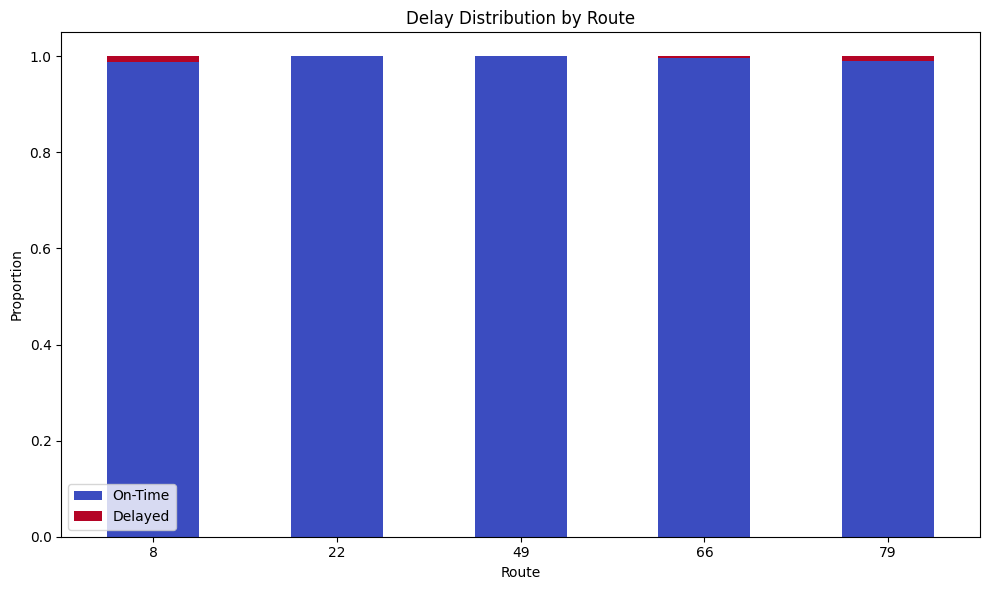

In [6]:
delay_df = df.groupby('rt')['dly'].value_counts(normalize=True).unstack().fillna(0)

delay_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Delay Distribution by Route")
plt.ylabel("Proportion")
plt.xlabel("Route")
plt.xticks(rotation=0)
plt.legend(["On-Time", "Delayed"])
plt.tight_layout()
plt.show()

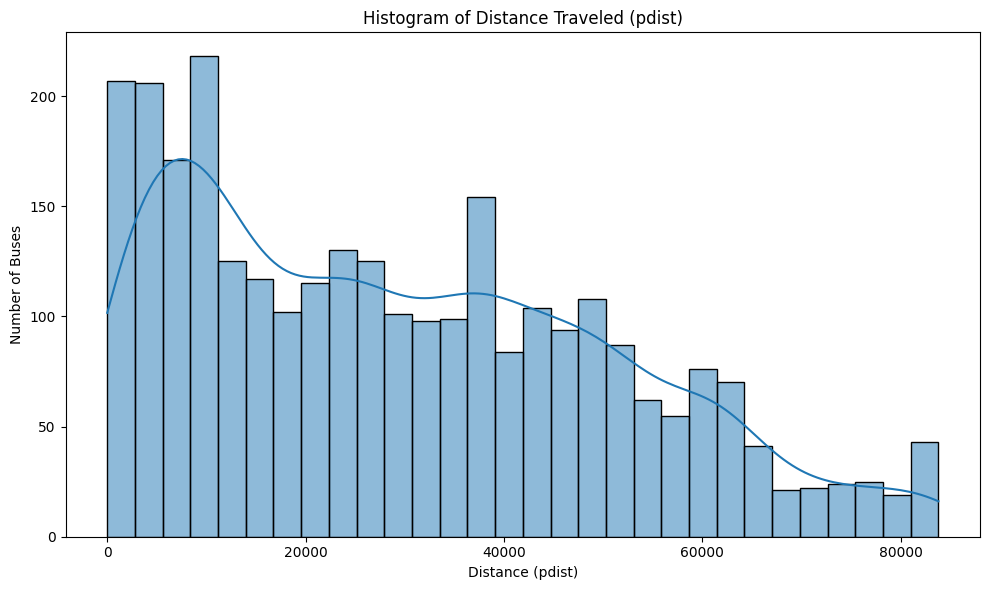

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pdist', bins=30, kde=True)
plt.title("Histogram of Distance Traveled (pdist)")
plt.xlabel("Distance (pdist)")
plt.ylabel("Number of Buses")
plt.tight_layout()
plt.show()

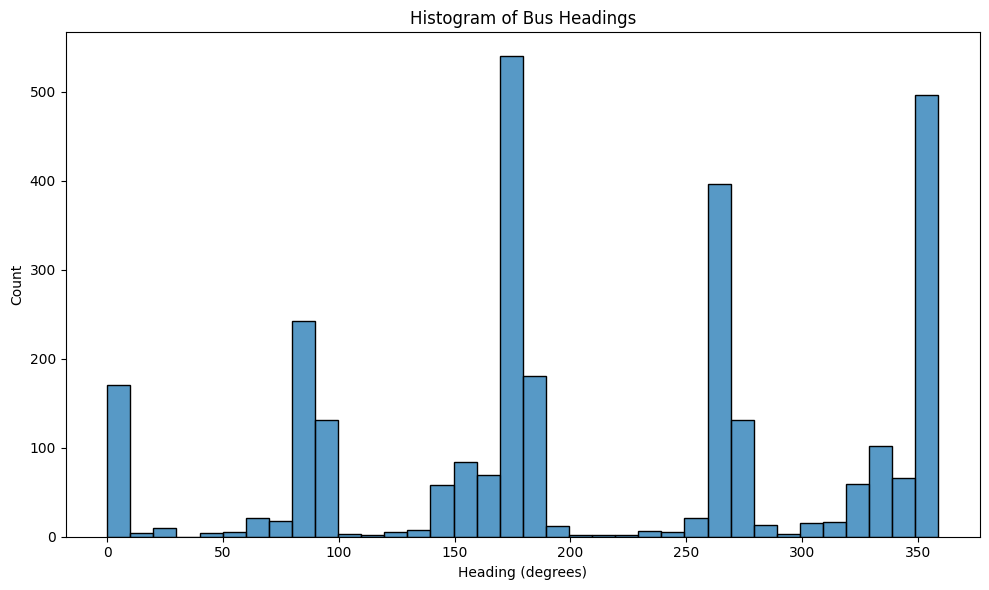

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hdg', bins=36)  # 10-degree intervals
plt.title("Histogram of Bus Headings")
plt.xlabel("Heading (degrees)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

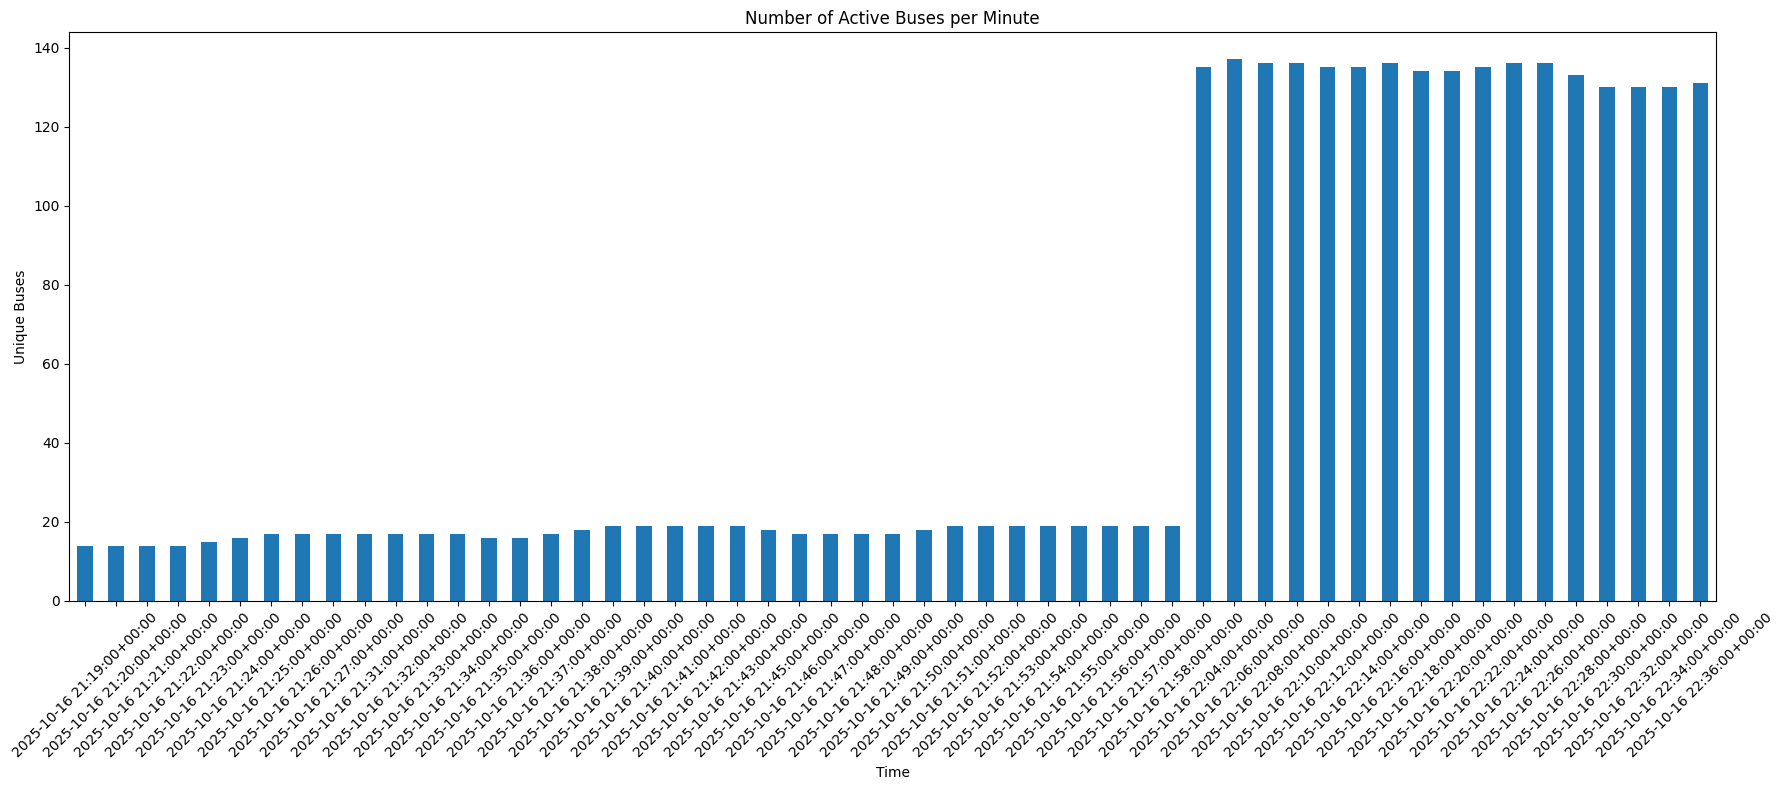

In [9]:
df['fetched_time'] = pd.to_datetime(df['fetched_at']).dt.floor('min')
bus_counts = df.groupby('fetched_time')['vid'].nunique()

plt.figure(figsize=(18, 8))
bus_counts.plot(kind='bar')
plt.title("Number of Active Buses per Minute")
plt.xlabel("Time")
plt.ylabel("Unique Buses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

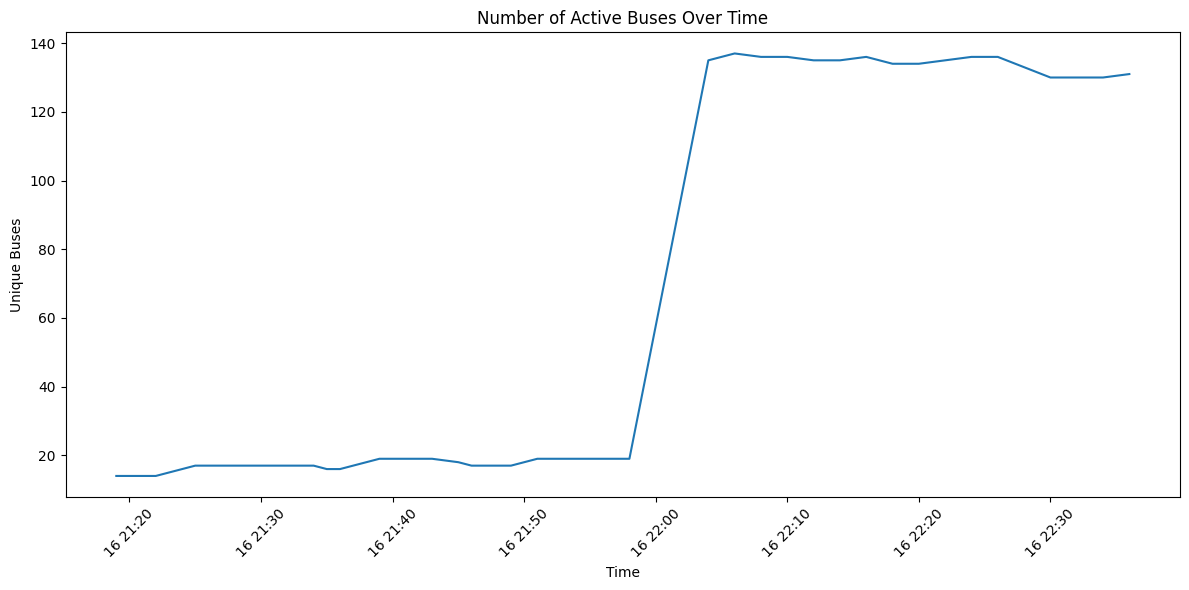

In [10]:
df['fetched_time'] = pd.to_datetime(df['fetched_at']).dt.floor('min')
bus_counts = df.groupby('fetched_time')['vid'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=bus_counts, x='fetched_time', y='vid')
plt.title("Number of Active Buses Over Time")
plt.xlabel("Time")
plt.ylabel("Unique Buses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

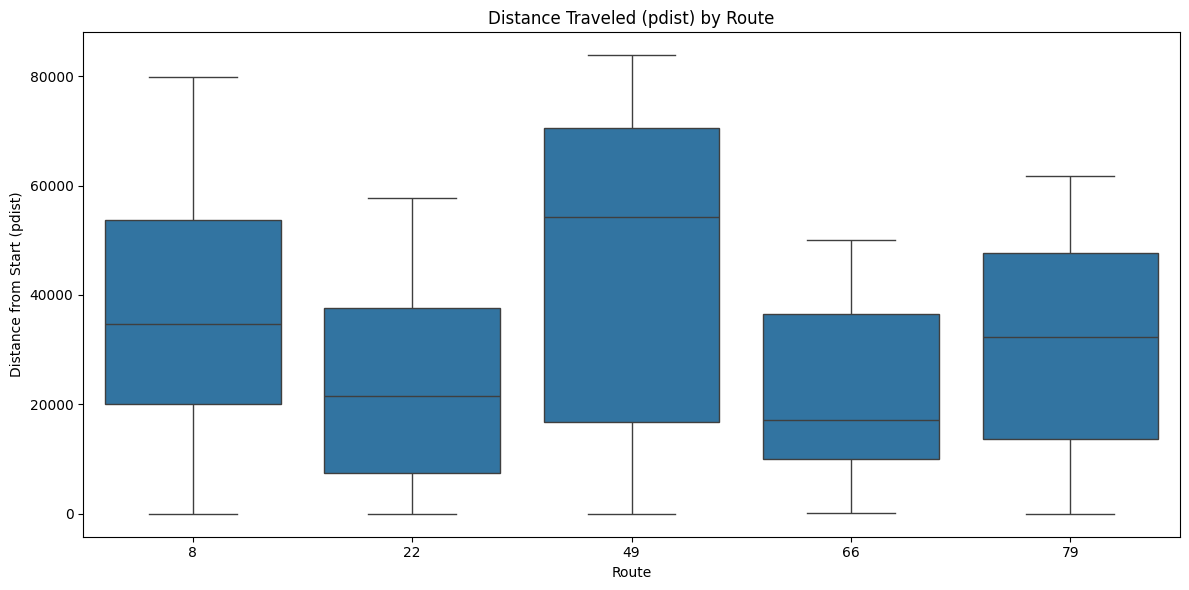

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='rt', y='pdist')
plt.title("Distance Traveled (pdist) by Route")
plt.xlabel("Route")
plt.ylabel("Distance from Start (pdist)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/kj/48qx581j72z522k79t6bd6q40000gn/T/ipykernel_20833/2721453243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='rt', y='hdg', inner='quartile', palette='Set2')


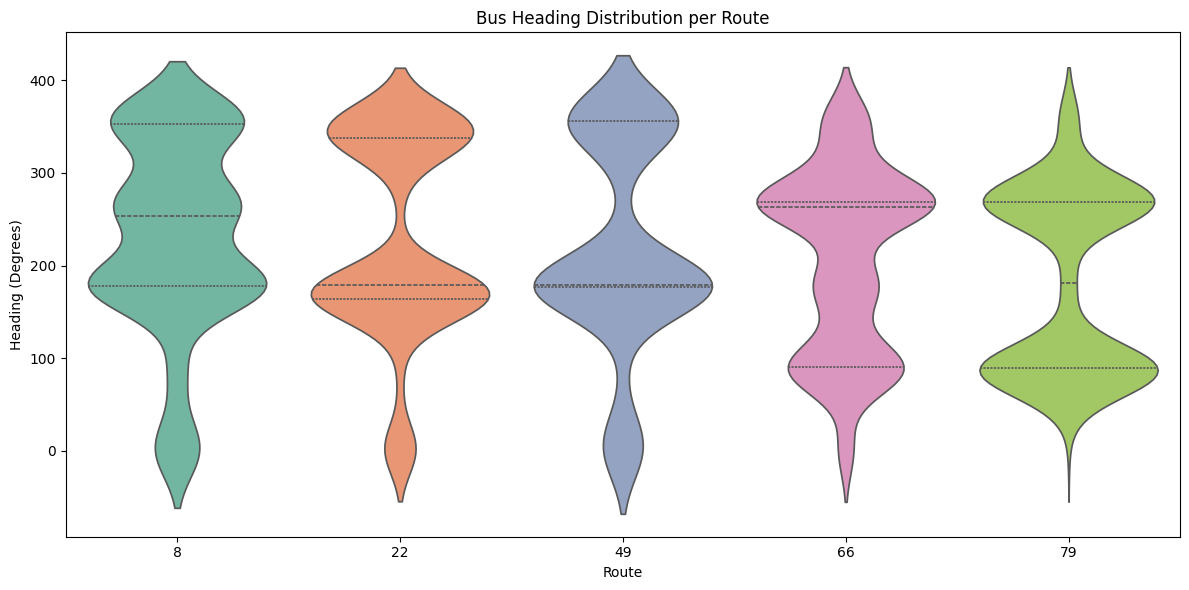

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='rt', y='hdg', inner='quartile', palette='Set2')
plt.title("Bus Heading Distribution per Route")
plt.xlabel("Route")
plt.ylabel("Heading (Degrees)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
m = folium.Map(location=[41.88, -87.63], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    lat, lon = row['lat'], row['lon']
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

m.save("bus_density_map.html") 
m

In [14]:
if 'fetched_at' in df.columns:
    df['fetched_at'] = pd.to_datetime(df['fetched_at'])

# Drop any rows with missing coordinates
df = df.dropna(subset=['lat', 'lon'])

# Initialize base map centered around downtown Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add heatmap layer
heat_data = df[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=8, blur=10).add_to(m)

# Save map to HTML or display in notebook (if using Jupyter)
m.save("bus_density_heatmap.html")
m